# Задание 1 

Напишите функцию, которая принимает на вход любой текст в виде строки и применяет к нему метод n-грамм, n передаётся в параметрах функции и является целым числом. На выходе должен быть список с n-граммами.

In [14]:
import nltk
def ngram(string, n):
    lst = []
    try:
        words = nltk.tokenize.word_tokenize(string)
        if len(words) < n or n == 0:
            return print("Error: n must be <= count of words in string!")
        grams = nltk.ngrams(string.split(), n)
        for gram in grams:
            lst.append(gram)
        return lst
    except ValueError:
        return print("Error: n must be <= count of words in string!")

print(ngram("Разделим этот текст пословно", 3))
print(ngram("Разделим этот текст пословно", 2))
print(ngram("Разделим этот текст пословно", 4))
print(ngram("Разделим этот текст пословно", 5))
print(ngram("Разделим этот текст пословно", 1))
print(ngram("Разделим этот текст пословно", 0))
print(ngram("Разделим этот текст пословно", -1))

[('Разделим', 'этот', 'текст'), ('этот', 'текст', 'пословно')]
[('Разделим', 'этот'), ('этот', 'текст'), ('текст', 'пословно')]
[('Разделим', 'этот', 'текст', 'пословно')]
Error: n must be <= count of words in string!
None
[('Разделим',), ('этот',), ('текст',), ('пословно',)]
Error: n must be <= count of words in string!
None
Error: n must be <= count of words in string!
None


# Задание 2

BLEU (bilingual evaluation understudy) - метрика для оценивания качества машинного перевода, основанная на сравнении перевода, предложенного алгоритмом, и референсного перевода (ground truth). Сравнение производится на основе подсчета n-грамм (n меняется от 1 до некоторого порога, например, 4), которые встретились и в предложенном переводе, и в референсном (ground truth). После подсчета совстречаемости n-грамм полученная метрика умножается на так называемый brevity penalty - штраф за слишком короткие варианты перевода. Brevity penalty считается как <количество слов в переводе, предложенном алгоритмом> / <количество слов в референсном переводе>.

Формула:
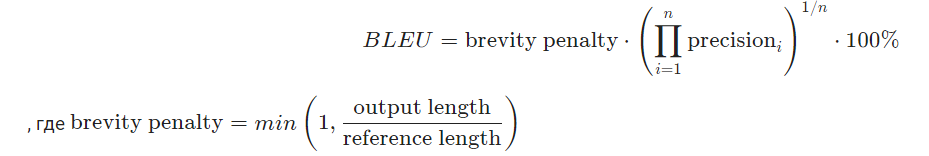

Пример решения:

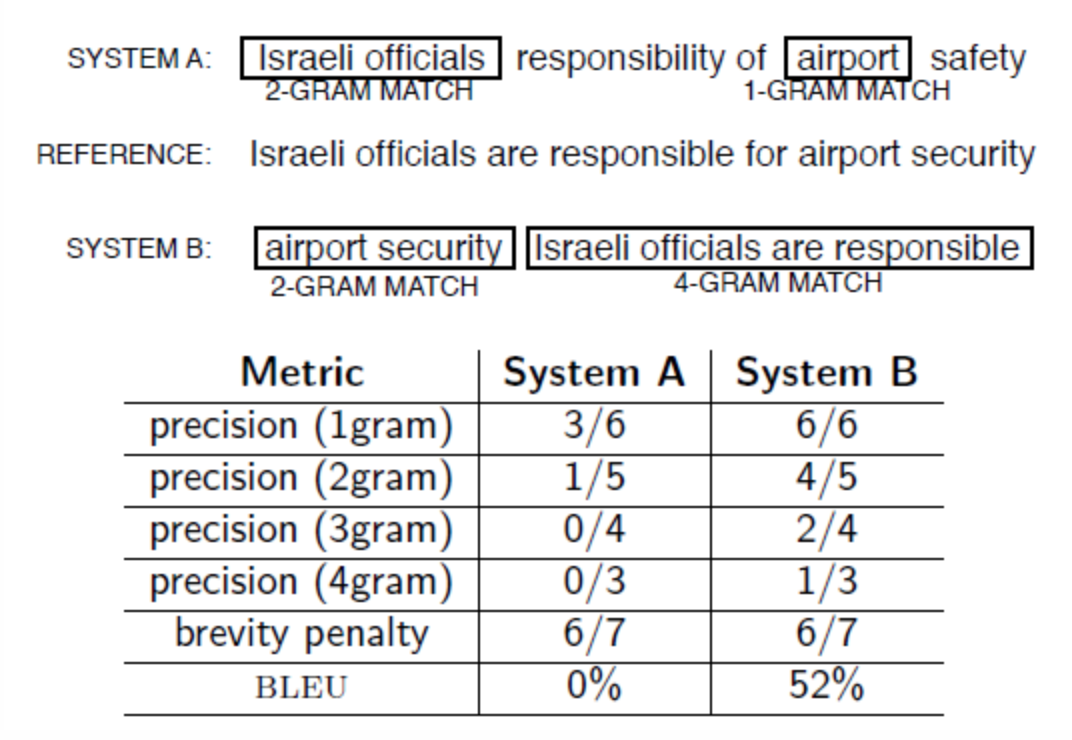

Напишите функцию для вычисления BLEU-score. На вход принимается две строки: перевод, предложенный алгоритмом, и референсный перевод. При подсчете метрики учитывайте n-граммы с n ∈ [1,2,3].

Перевод, предложенный алгоритмом: "Кошка вышла из дома и села на крыльцо"

Референсный перевод (ground truth): "Кошка вышла из комнаты и села на ступеньки"

На выходе должен быть ответ в виде процентов, округлённый до целых.

In [36]:
from nltk.translate.bleu_score import sentence_bleu
import warnings
warnings.filterwarnings('ignore')
def bleu_score(algo, ref):
    one_gram = int(sentence_bleu([ref], algo, weights=(1, 0, 0, 0)) * 100)
    two_gram = int(sentence_bleu([ref], algo, weights=(0, 1, 0, 0)) * 100)
    three_gram = int(sentence_bleu([ref], algo, weights=(0, 0, 1, 0)) * 100)
    return max(one_gram,two_gram,three_gram)
print('Answer:',repr(bleu_score("Кошка вышла из дома и села на крыльцо", "Кошка вышла из комнаты и села на ступеньки")) + '%')
print('Answer:',repr(bleu_score("Кошка вышла из", "Кошка вышла из")) + '%')
print('Answer:',repr(bleu_score("Кошка вышла из дома и села", "Кошка вышла из комнаты и села")) + '%')
print('Answer:',repr(bleu_score("Вышла из дома и села на крыльцо", "Вышла из")) + '%')
print('Answer:',repr(bleu_score("Вышла", "Вышла из дома и села на крыльцо")) + '%')

Answer: 75%
Answer: 100%
Answer: 85%
Answer: 25%
Answer: 0%


# Задание 3
Вспомните методы векторизации из прошлых уроков и проведите аналогичную классификацию, но также применив n-граммы. Сравните результаты.

Проведите классификацию текстов с применением n-грамм:


1.   Проведите предобработку
2.   Примените n-граммы с значением n = 2. Выше брать не будем, иначе расчеты могут сильно увеличиться по времени
3.   Проведите векторизацию с помощью Word2Vec
4.   Обучите на полученных данных модель градиентного бустинга
5.   Сравните эффективность модели, обученой ранее без применения n-грамм, с полученными моделями по показателю precision



In [107]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
Names = ['id','date','name','text','positive','rep','rtv','fav','total_count', 'fol','friends','list_count']
df = pd.read_csv('../datasets/positive.csv',names=Names,sep=';')
df2 = pd.read_csv('../datasets/negative.csv',names=Names,sep=';')
df3 = pd.concat([df,df2],ignore_index=True)
preprocessed_df = pd.concat([df3[100000:120000]],ignore_index=True)
preprocessed_df = preprocessed_df[["text", "positive"]]
preprocessed_df.text = preprocessed_df.text.str.lower()
preprocessed_df.text = preprocessed_df.text.str.replace(r"[^А-Яа-я]"," ")
preprocessed_df.text = list(map(word_tokenize, preprocessed_df.text))
russian_stopwords = stopwords.words("russian")
russian_stopwords.sort()
russian_stopwords = set(russian_stopwords)
def delete_stopword(words):
    global russian_stopwords
    new_s = [word for word in words if word not in russian_stopwords]
    return new_s
preprocessed_df.text = list(map(delete_stopword, preprocessed_df.text))
preprocessed_df.positive[preprocessed_df.positive==-1] = 0

In [108]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np
morph = pymorphy2.MorphAnalyzer()

def text_preprocessing(text):
    """Функция принимает строку и возвращает список слов в начальной форме"""
    text = text.lower()                                                         # приводим текст к нижнему регистру
    text = re.sub(r"[^А-Яа-я]", " ", text)                                      # удаляем все некириллические символы
    words = word_tokenize(text)                                                 # разбиваем тексты на списки слов
    words = [morph.parse(word)[0].normal_form for word in words]                # приводим слова к начальной форме
    words = [word for word in words if word not in stopwords.words("russian")]  # удаляем слова из стоп-листа
    return words

def text_to_2_gramms(string):
    lst = []
    str = ''
    for i in range(0,len(string)):
        str += string[i] + ' '
    try:
        grams = nltk.ngrams(str.split(), 2)
        for gram in grams:
            lst.append(gram)
        return lst
    except ValueError: 
        print("Error: n must be <= 0!")
        return lst

def word2vec(lst):
    lst2 = []
    model = Word2Vec(lst, min_count=1)
    for i in range(0,len(lst)):
        for j in range(0, len(lst[i])):
            lst2.append(lst[i][j])
    index = model.wv.key_to_index
    res = [index[lst2[i]] for i in range(0,len(lst2))]
    # return model.wv.vectors
    return res

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tweets = [TaggedDocument(doc, [i]) for i, doc in enumerate(preprocessed_df.text)]
d2v = Doc2Vec(tweets, min_count=1)                   
d2v.train(tweets, total_examples=len(tweets), epochs=20)
def transform_text_array_to_vector_dataframe(text_array):
    """Функция, которая преобразует одномерный колонку списков слов из текстов
    в датафрейм со значениями векторов этих текстов"""
    columns = [str(n) for n in range(d2v.vector_size)]               # задаем список названий колонок - просто порядковые номера
    vectors_ndarray = text_array.apply(d2v.infer_vector).to_list()  # прогоняем каждый текст через модель doc2vec и формируем многомерный массив чисел
    return pd.DataFrame(vectors_ndarray, columns=columns)   

def grad_boost():
    X_train_texts, X_test_texts, y_train, y_test = train_test_split(preprocessed_df.text, preprocessed_df.positive, test_size=0.2, random_state=21)
    X_train = transform_text_array_to_vector_dataframe(X_train_texts)
    X_test = transform_text_array_to_vector_dataframe(X_test_texts)
    xgb = XGBClassifier(max_depth=10, n_estimators=50)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    cr = classification_report(y_pred, y_test)
    return cr

In [109]:
# проверка задания 3
text = 'Средства у нас есть, у нас ума не хватает'
prep_text = text_preprocessing(text)  # содержимое этой переменной сравнить с чек-листом
grammed_text = text_to_2_gramms(prep_text) # содержимое этой переменной сравнить с чек-листом
print(prep_text)
print(grammed_text)
vectorized_grammed_text = word2vec(grammed_text)  # содержимое этой переменной сравнить с чек-листом -> набор чисел (вектор)
print(vectorized_grammed_text)
model_score = grad_boost() # содержимое этой переменной сравнить с чек-листом -> precision, число от 0 до 1
print(model_score)


['средство', 'ум', 'хватать']
[('средство', 'ум'), ('ум', 'хватать')]
[2, 0, 0, 1]
[17:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.13      0.43      0.20       316
           1       0.94      0.76      0.84      3684

    accuracy                           0.73      4000
   macro avg       0.53      0.59      0.52      4000
weighted avg       0.88      0.73      0.79      4000



# Задание 4
Используя модель LDA, кластеризуйте твиты на положительные и негативные. Для этого:
1. Проведите предобработку данных
2. Представьте корпус твитов в виде Терм-документной матрицы (CountVectorizer), не забудьте о стоп-словах
3. Поэксперементируйте с параметром `max-iter` модели, подберите лучший вариант. [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
4. В качестве оценки используйте степень правдоподобия (Log-likehood). Сделайте сравнительный анализ степеней правдоподобия, соответсвующих каждому рассмотренному набору параметров (например, в виде графиков зависимости степени правдоподобия от конкретного параметра).

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
Names = ['id','date','name','text','positive','rep','rtv','fav','total_count', 'fol','friends','list_count']
df = pd.read_csv('../datasets/positive.csv',names=Names,sep=';')
df2 = pd.read_csv('../datasets/negative.csv',names=Names,sep=';')
df3 = pd.concat([df,df2],ignore_index=True)
preprocessed_df = pd.concat([df3[100000:120000]],ignore_index=True)
preprocessed_df = preprocessed_df[["text", "positive"]]
preprocessed_df.text = preprocessed_df.text.str.lower()
preprocessed_df.text = preprocessed_df.text.str.replace(r"[^А-Яа-я]"," ")
preprocessed_df.text = list(map(word_tokenize, preprocessed_df.text))
russian_stopwords = stopwords.words("russian")
russian_stopwords.sort()
russian_stopwords = set(russian_stopwords)
def delete_stopword(words):
    global russian_stopwords
    new_s = [word for word in words if word not in russian_stopwords]
    return new_s
preprocessed_df.text = list(map(delete_stopword, preprocessed_df.text))
preprocessed_df.positive[preprocessed_df.positive==-1] = 0
preprocessed_df

,text,positive
0,"[всем, приятного, аппетита, это, нелегкое, обе...",1
1,"[спасибо, тип, забывает, оказывается, таких, с...",1
2,"[неловкий, момент, ноутбук, дороже, квартиры]",1
3,"[верен, всем, своим, девушкам, вместе, любим, ...",1
4,"[сестра, получила, подтверждение, степени, кан...",1
...,...,...
19995,"[милая, спать, пошла, поздновато, сладких, снов]",0
19996,"[посчитал, выяснил, здать, нужно, начинать, уч...",0
19997,"[лицее, перестала, успевать]",0
19998,"[духоподъемная, атмосфера, майдана, никак, вяж...",0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
tokens_corpus = [nltk.word_tokenize(item) for item in preprocessed_df.text[0]]
# for i in range(1,len(preprocessed_df.text)):
#     tokens_corpus += [nltk.word_tokenize(item) for item in preprocessed_df.text[i]]
lems_corpus = [' '.join([morph.parse(elem)[0].normal_form for elem in item]) 
              for item in tokens_corpus]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lems_corpus)
vectorizer.get_feature_names_out()

array(['аппетит', 'арка', 'весь', 'время', 'нелёгкий', 'обеденный',
       'приятный', 'это'], dtype=object)

In [5]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,аппетит,арка,весь,время,нелёгкий,обеденный,приятный,это
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0
7,0,1,0,0,0,0,0,0


In [6]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10)
lda.fit(X)
db = pd.DataFrame(lda.exp_dirichlet_component_, columns=vectorizer.get_feature_names_out(),index=['IT', 'Cooking', 'Agricultural industry'])
db

,аппетит,арка,весь,время,нелёгкий,обеденный,приятный,это
IT,0.007255,0.141224,0.007255,0.007193,0.141224,0.141224,0.007255,0.141224
Cooking,0.168302,0.008713,0.168302,0.008577,0.008713,0.008713,0.168302,0.008713
Agricultural industry,0.014195,0.014327,0.014195,0.272027,0.014327,0.014327,0.014195,0.014327


In [7]:
db = pd.DataFrame(lda.transform(X), columns=['IT', 'Cooking', 'Agricultural_industry'], index=vectorizer.get_feature_names_out())
db

,IT,Cooking,Agricultural_industry
аппетит,0.167765,0.663368,0.168867
арка,0.167765,0.663368,0.168867
весь,0.167765,0.663368,0.168867
время,0.662400,0.168256,0.169344
нелёгкий,0.662400,0.168256,0.169344
обеденный,0.662400,0.168256,0.169344
приятный,0.167338,0.167470,0.665192
это,0.662400,0.168256,0.169344


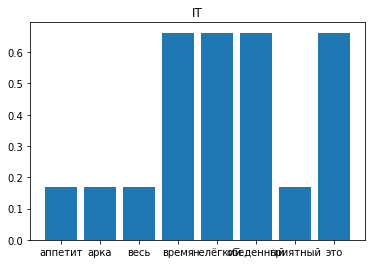

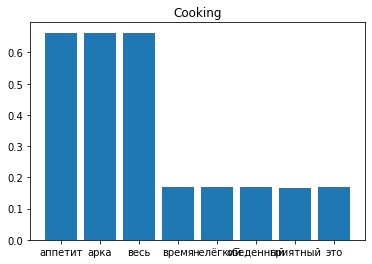

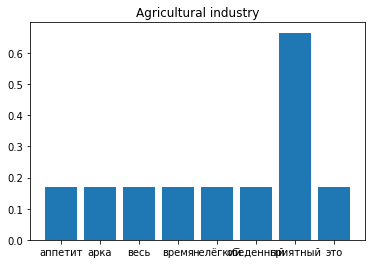

In [12]:
import matplotlib.pyplot as plt
IT = [db.IT[i] for i in range(0,len(db.IT))]
C = [db.Cooking[i] for i in range(0,len(db.Cooking))]
A = [db.Agricultural_industry[i] for i in range(0,len(db.Agricultural_industry))]
plt.bar(db.index, IT)
plt.title('IT')
plt.show()
plt.bar(db.index, C)
plt.title('Cooking')
plt.show()
plt.bar(db.index, A)
plt.title('Agricultural industry')
plt.show()

In [13]:
lda2 = LatentDirichletAllocation(n_components=3, max_iter=100)
lda2.fit(X)
pd.DataFrame(lda2.exp_dirichlet_component_, columns=vectorizer.get_feature_names_out(),index=['IT', 'Cooking', 'Agricultural industry'])

,аппетит,арка,весь,время,нелёгкий,обеденный,приятный,это
IT,0.010767,0.010767,0.010767,0.010767,0.010767,0.010767,0.208284,0.208284
Cooking,0.168431,0.008666,0.008666,0.168431,0.168431,0.008666,0.008621,0.008621
Agricultural industry,0.008666,0.168431,0.168431,0.008666,0.008666,0.168431,0.008621,0.008621


In [14]:
db2 = pd.DataFrame(lda2.transform(X), columns=['IT', 'Cooking', 'Agricultural_industry'], index=vectorizer.get_feature_names_out())
db2

,IT,Cooking,Agricultural_industry
аппетит,0.168314,0.167983,0.663703
арка,0.664560,0.167720,0.167720
весь,0.168314,0.663703,0.167983
время,0.664560,0.167720,0.167720
нелёгкий,0.168314,0.663703,0.167983
обеденный,0.168314,0.167983,0.663703
приятный,0.168314,0.663703,0.167983
это,0.168314,0.167983,0.663703


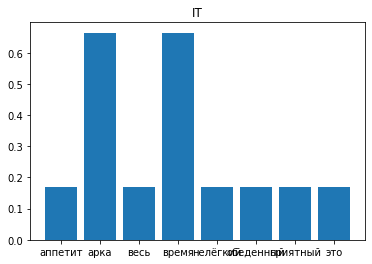

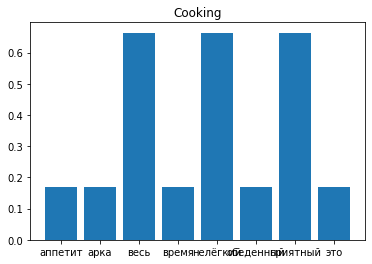

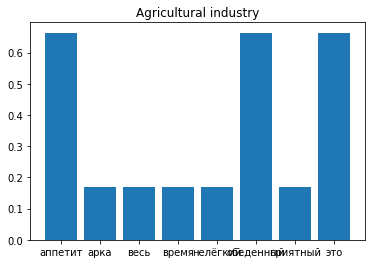

In [15]:
IT = [db2.IT[i] for i in range(0,len(db2.IT))]
C = [db2.Cooking[i] for i in range(0,len(db2.Cooking))]
A = [db2.Agricultural_industry[i] for i in range(0,len(db2.Agricultural_industry))]
plt.bar(db2.index, IT)
plt.title('IT')
plt.show()
plt.bar(db2.index, C)
plt.title('Cooking')
plt.show()
plt.bar(db2.index, A)
plt.title('Agricultural industry')
plt.show()

In [9]:
lda3 = LatentDirichletAllocation(n_components=3, max_iter=1000)
lda3.fit(X)
pd.DataFrame(lda3.exp_dirichlet_component_, columns=vectorizer.get_feature_names_out(),index=['IT', 'Cooking', 'Agricultural industry'])

,аппетит,арка,весь,время,нелёгкий,обеденный,приятный,это
IT,0.014327,0.014327,0.014195,0.014195,0.014327,0.014327,0.014195,0.272027
Cooking,0.008713,0.008713,0.168302,0.168302,0.008713,0.008713,0.168302,0.008577
Agricultural industry,0.141224,0.141224,0.007255,0.007255,0.141224,0.141224,0.007255,0.007193


In [10]:
db3 = pd.DataFrame(lda3.transform(X), columns=['IT', 'Cooking', 'Agricultural_industry'], index=vectorizer.get_feature_names_out())
db3

,IT,Cooking,Agricultural_industry
аппетит,0.168867,0.663368,0.167765
арка,0.168867,0.663368,0.167765
весь,0.169344,0.168256,0.662400
время,0.665192,0.167470,0.167338
нелёгкий,0.169344,0.168256,0.662400
обеденный,0.169344,0.168256,0.662400
приятный,0.168867,0.663368,0.167765
это,0.169344,0.168256,0.662400


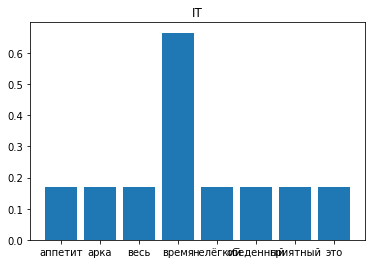

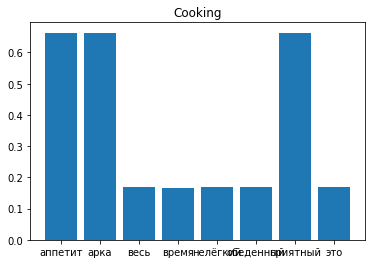

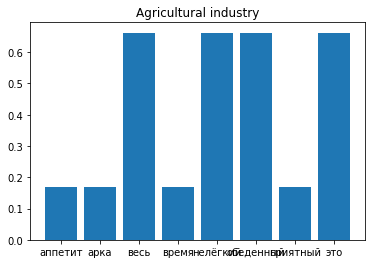

In [17]:
IT = [db3.IT[i] for i in range(0,len(db3.IT))]
C = [db3.Cooking[i] for i in range(0,len(db3.Cooking))]
A = [db3.Agricultural_industry[i] for i in range(0,len(db3.Agricultural_industry))]
plt.bar(db3.index, IT)
plt.title('IT')
plt.show()
plt.bar(db3.index, C)
plt.title('Cooking')
plt.show()
plt.bar(db3.index, A)
plt.title('Agricultural industry')
plt.show()

In [38]:
lda4 = LatentDirichletAllocation(n_components=3, max_iter=10000)
lda4.fit(X)
pd.DataFrame(lda4.exp_dirichlet_component_, columns=vectorizer.get_feature_names_out(),index=['IT', 'Cooking', 'Agricultural industry'])

,аппетит,арка,весь,время,нелёгкий,обеденный,приятный,это
IT,0.141279,0.007222,0.007222,0.007222,0.141279,0.141279,0.007222,0.141279
Cooking,0.010837,0.208191,0.010693,0.010693,0.010837,0.010837,0.208191,0.010837
Agricultural industry,0.010837,0.010693,0.208191,0.208191,0.010837,0.010837,0.010693,0.010837


In [70]:
db4 = pd.DataFrame(lda4.transform(X), columns=['IT', 'Cooking', 'Agricultural_industry'], index=vectorizer.get_feature_names_out())
db4

,IT,Cooking,Agricultural_industry
аппетит,0.167546,0.167981,0.664473
арка,0.167546,0.664473,0.167981
весь,0.662681,0.168659,0.168659
время,0.662681,0.168659,0.168659
нелёгкий,0.662681,0.168659,0.168659
обеденный,0.662681,0.168659,0.168659
приятный,0.167546,0.167981,0.664473
это,0.167546,0.664473,0.167981


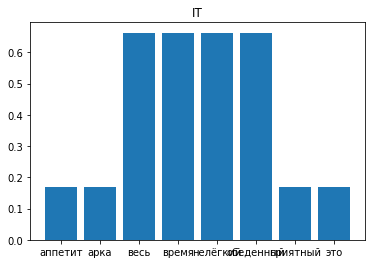

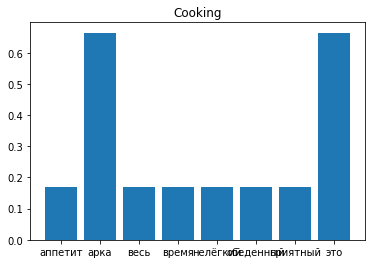

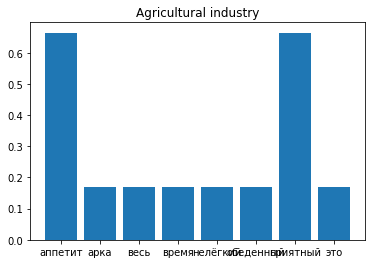

In [71]:
IT = [db4.IT[i] for i in range(0,len(db4.IT))]
C = [db4.Cooking[i] for i in range(0,len(db4.Cooking))]
A = [db4.Agricultural_industry[i] for i in range(0,len(db4.Agricultural_industry))]
plt.bar(db4.index, IT)
plt.title('IT')
plt.show()
plt.bar(db4.index, C)
plt.title('Cooking')
plt.show()
plt.bar(db4.index, A)
plt.title('Agricultural industry')
plt.show()